In [17]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
import iexfinance as iex
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Use the `get_symbols` function from the iexfinance SDK to fetch available stock tickers
tickers=pd.DataFrame(get_symbols())
tickers.head()

,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
0,USD,2019-09-18,NYS,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,A,cs
1,USD,2019-09-18,NYS,IEX_4238333734532D52,True,Alcoa Corp.,US,AA,cs
2,USD,2019-09-18,PSE,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,AAAU,et
3,USD,2019-09-18,NAS,IEX_4E5434354A302D52,True,Altaba Inc.,US,AABA,cef
4,USD,2019-09-18,NYS,IEX_4843364642592D52,True,AAC Holdings Inc.,US,AAC,cs


In [19]:
list_of_tickers = ["ACB", "GWPH", "CRON", "CGC", "TLRY", "APHA"]
# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for "SPY" and "AGG"
df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas')
df.head()

ACB                          GWPH                          \
           open high low close volume    open    high     low   close   
date                                                                    
2018-09-18  NaN  NaN NaN   NaN    NaN  141.54  151.71  140.38  149.20   
2018-09-19  NaN  NaN NaN   NaN    NaN  154.00  166.42  150.10  153.64   
2018-09-20  NaN  NaN NaN   NaN    NaN  155.03  174.50  154.47  170.10   
2018-09-21  NaN  NaN NaN   NaN    NaN  170.01  172.50  163.00  164.98   
2018-09-24  NaN  NaN NaN   NaN    NaN  164.16  169.50  162.09  166.52   

                     ...    TLRY                                     APHA  \
             volume  ...    open    high     low   close    volume   open   
date                 ...                                                    
2018-09-18   713691  ...  134.65  155.10  132.00  154.98  19955697  15.66   
2018-09-19  2464533  ...  233.58  300.00  151.40  214.06  31717724  16.37   
2018-09-20  2913383  ...  214.11  244.00  158.00  176.35  20493545  15.31   
2018-09-21   975812  ...  148.87  148.88  121.51  123.00  16097705  15.13   
2018-09-24   523537  ...  100.98  121.79   97.12   99.50  12388846  15.00   

                                          
             high    low  close   volume  
date                                      
2018-09-18  16.17  15.22  16.00  2750233  
2018-09-19  16.66  14.33  14.99  4916190  
2018-09-20  15.85  14.43  15.45  2594738  
2018-09-21  15.40  14.35  15.31  1646443  
2018-09-24  15.80  14.74  15.40  1255769  

[5 rows x 30 columns]

In [20]:
## Cleaning the Data
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,ACB,GWPH,CRON,CGC,TLRY,APHA
,close,close,close,close,close,close
date,,,,,,
2018-09-18,NaN,149.20,11.56,51.89,154.98,16.00
2018-09-19,NaN,153.64,12.69,49.35,214.06,14.99
2018-09-20,NaN,170.10,13.75,52.40,176.35,15.45
2018-09-21,NaN,164.98,12.51,49.78,123.00,15.31
2018-09-24,NaN,166.52,11.86,52.50,99.50,15.40


In [29]:
df.dtypes

ACB   close    float64
GWPH  close    float64
CRON  close    float64
CGC   close    float64
TLRY  close    float64
APHA  close    float64
dtype: object

In [21]:
# Calculating the daily return 
daily_returns = df.pct_change()
daily_returns.head()

,ACB,GWPH,CRON,CGC,TLRY,APHA
,close,close,close,close,close,close
date,,,,,,
2018-09-18,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,NaN,0.029759,0.097751,-0.048950,0.381210,-0.063125
2018-09-20,NaN,0.107134,0.083530,0.061803,-0.176166,0.030687
2018-09-21,NaN,-0.030100,-0.090182,-0.050000,-0.302523,-0.009061
2018-09-24,NaN,0.009334,-0.051958,0.054640,-0.191057,0.005879


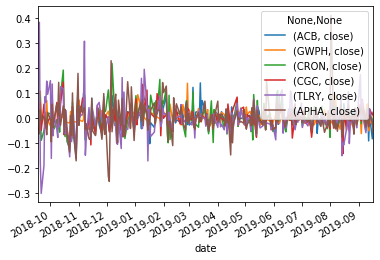

In [37]:
daily_returns.plot()

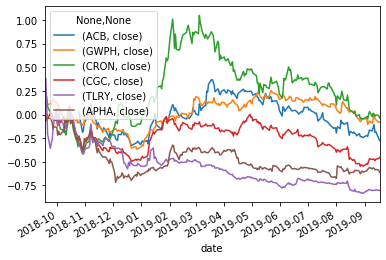

In [38]:
cumulative_returns = (1+ daily_returns).cumprod()-1
cumulative_returns.plot()

In [22]:
# Calculte volatility (standard deviation)

In [23]:
avg_daily_return_ACB= daily_returns.mean()['ACB']['close']
avg_daily_return_GWPH = daily_returns.mean()['GWPH']['close']

# Use the `std` function to calculate the standard deviation of daily returns for `SPY` and `AGG`, respectively
std_dev_daily_return_ACB = daily_returns.std()['ACB']['close']
std_dev_daily_return_GWPH = daily_returns.std()['GWPH']['close']
std_dev_daily_return_ACB

0.04164341564150161

In [31]:
# Monte Carlo Simulation

In [32]:
acb_last_price = df['ACB']['close'][-1]
gwph_last_price = df['GWPH']['close'][-1]

In [33]:
## Set Up Montecarlo Parameters
number_simulations = 100
number_records = 252 * 3

In [35]:
### Initialize DataFrame to hold simulated prices
monte_carlo_price = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

### Run the simulation of projecting stock prices
for x in range(number_simulations):
    # Simulate prices with the last day close for each action
    simulated_ACB_prices = [acb_last_price]
    simulated_GWPH_prices = [gwph_last_price]
    
    # Simulate the returns for 252 * 3 days
    for i in range(number_records):
        # calculate the simulated price using the last price
        simulated_ACB_price = simulated_ACB_prices[-1] * (1 + np.random.normal(avg_daily_return_ACB, std_dev_daily_return_ACB))
        simulated_GWPH_price = simulated_GWPH_prices[-1] * (1 + np.random.normal(avg_daily_return_GWPH, std_dev_daily_return_GWPH))
        # Append simulated prices of each simulation to DataFrame
        simulated_ACB_prices.append(simulated_ACB_price)
        simulated_GWPH_prices.append(simulated_GWPH_price)
    # Append simulated prices of each simulation to DataFrame
    monte_carlo_price["ACB prices"] = pd.Series(simulated_ACB_prices)
    monte_carlo_price["GWPH prices"] = pd.Series(simulated_GWPH_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo_price.pct_change()
    
    # Portfolio weights (60% ACB; 40% GWPH)
    weights = [0.6, 0.4]
    # Use 'dot' function with the weights to calculate portfolio daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1+ portfolio_daily_returns.fillna(0)).cumprod()
    
### Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.964210,0.996021,0.986138,0.970296,1.017298,1.003617,0.961431,1.002278,1.004198,1.008401,...,1.004127,0.951634,0.994213,1.006732,0.994297,1.014810,0.994759,0.958485,1.036137,0.988824
2,0.941603,1.024608,1.004911,0.933671,1.018896,1.025754,0.978028,0.992397,1.064262,0.971023,...,0.945853,0.879611,0.979577,1.006316,0.986008,1.014122,1.030917,1.007948,1.059847,1.000619
3,0.920833,1.027567,1.009550,0.972932,1.005110,1.023056,0.995618,1.057006,1.033761,0.957048,...,0.936728,0.879277,1.013234,1.025027,0.988088,1.021350,1.003013,1.049713,1.068122,0.986199
4,0.898388,1.029854,1.052680,0.954635,0.989292,0.998908,0.970749,1.060488,1.000901,0.949222,...,0.953005,0.897744,1.010922,1.049324,0.977225,1.008970,0.993726,1.014301,1.028901,0.963439


In [ ]:
# Visualize the Simulation

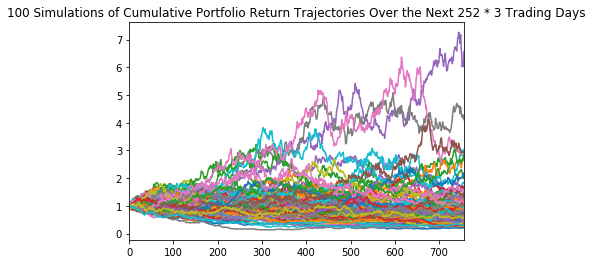

In [36]:
#### `Plot` function to plot `100` simulations of the potential trajectories of the portfolio based on 252 * 3 trading days
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 * 3 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)